# Titanic Project

## Problem Statement:

- To predict if a passenger survived the sinking of the Titanic or not.

## Attribute Infromation

### Features

- **PassengerId** - Total number of passengers on the ship labelled starting from 1
- **Pclass**	  - Passenger Class (1 = 1st class; 2 = 2nd class; 3 = 3rd class)
- **Name**        - Name of the passenger
- **Sex**	      - Gender of the passenger (Male / Female)   
- **Age**         - Age of the passenger	
- **Sibsp**	      - Number of Siblings/Spouses Aboard the Titanic	
- **Parch**	      - Number of Parents/Children Aboard the Titanic	
- **Ticket**	  - Ticket number	
- **Fare**	      - Passenger Fare/Price of the ticket
- **Cabin**	      - Cabin/Room numbers where the passengers were staying in the ship	
- **Embarked**	  - Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

### Label

- **Survived**	  -	 Survival (0 = No; 1 = Yes)

### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch:** The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.simplefilter("ignore")

import joblib

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations

Categorical Column

- Pclass
- Sex
- SibSp
- Parch
- Cabin
- Embarked

Continous Column

- Age
- Ticket
- Fare   
   
Other

- PassengerId and Name column are just unique values and not needed to built the model
- Ticket column just shows a list of numbers paired with few alphabets that is basically indicating towards the unique allotment given to the passengers so not needed to built the model
- Null values in Age
- std is imbalanced in fare and age and ouliers are also there

### Exploratory Data Analysis (EDA)

In [4]:
# dropping PassengerId and Name column
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [5]:
df.shape

(891, 9)

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [7]:
# Checking Null Values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Getting percentage of null values present in data
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Cabin consist 77% of Null Data while age contain 19% and embarked contained 00.2% of null data.

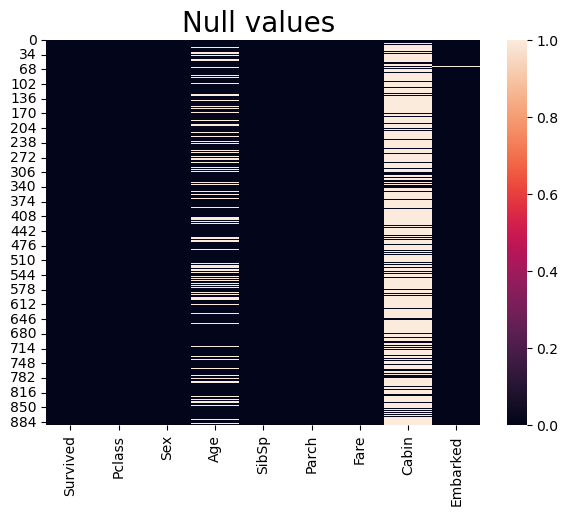

In [9]:
# Ploting dataset for double check null values

plt.figure(figsize=(7,5))
plt.title('Null values ',fontsize=20)
sns.heatmap(df.isnull())
plt.show()

In [10]:
df = df.drop("Cabin", axis=1)

Removed the "Cabin" column since most of its data was missing and there was no point of filling around 80 percent data manually into a column.

In [11]:
# Dataframe after dropping PassengerID , Name and Cabin Column.
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab_enc = LabelEncoder()

In [14]:
df['Sex'] = lab_enc.fit_transform(df['Sex'])

In [15]:
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


With the above information we see a variation in the data types for our columns present in the given dataset. There are 2 columns filled with float values, 4 columns have integer values and the remaining 3 columns have object data type. Since object data type cannot be used to build a machine learning model we will need to check if they have any inputs to provide and encode them for usage purpose.

In [17]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

Using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers. Whether those outliers are genuine or will need to be treated before creating our machine learning model.


The acceptable range for skewness is +/-0.5. We can see that columns 'Survived' and 'Age' are the only one's within that range and for the rest of the columns will need to check for further information on them.

# Visualization

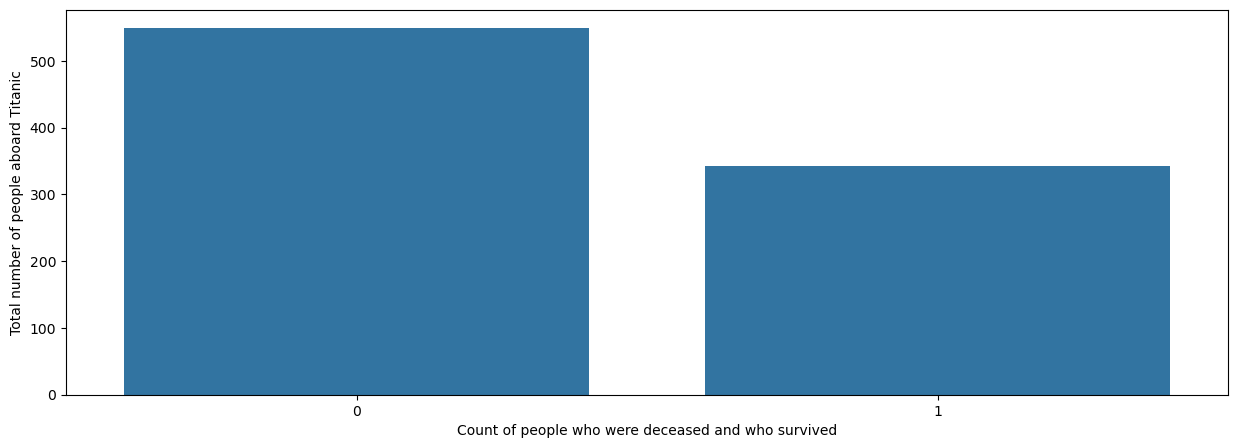

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the above count plot 0 depicts the number of people who drowned when the Titanic sank and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

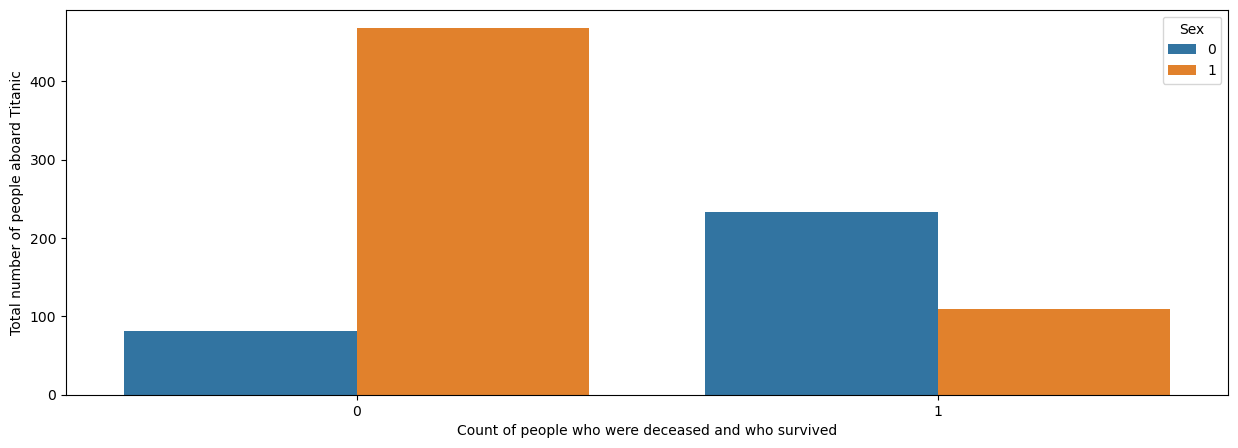

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Sex')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Adding the sex column shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children.

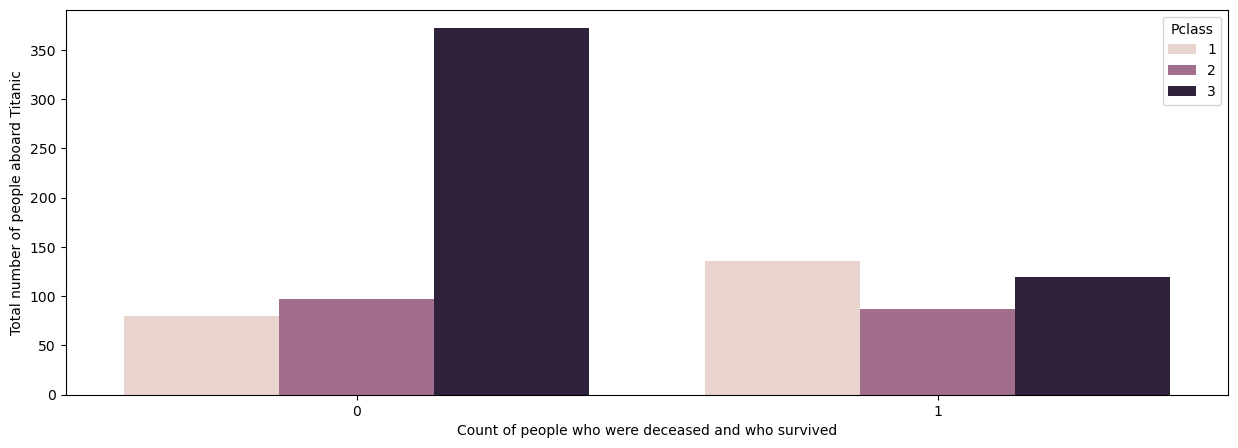

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Pclass')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Just like the Sex column when I tried checking for a visual representation over the passenger class factor I see that the highest number of deaths happened for class 3 people because again the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 folks were being rescued they ran out of life boats and time as well since the Titanic had almost sank into the ocean.

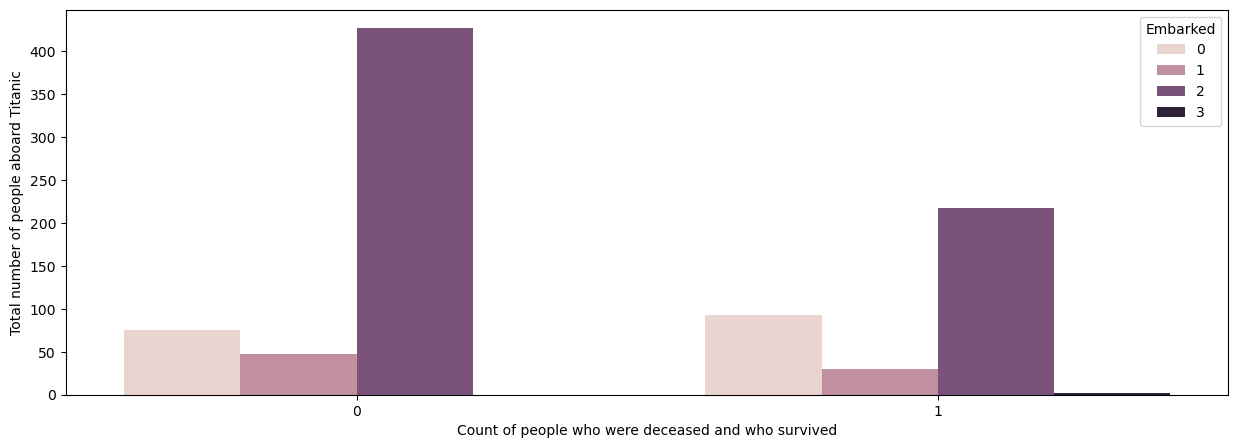

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Embarked')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Taking a look at the embarked data it looks like the port where the passengers embarked the Titanic has very less to offer but definitely indicates that it still has inputs in terms of folks traveling from S=Southampton have died the most than they survived.

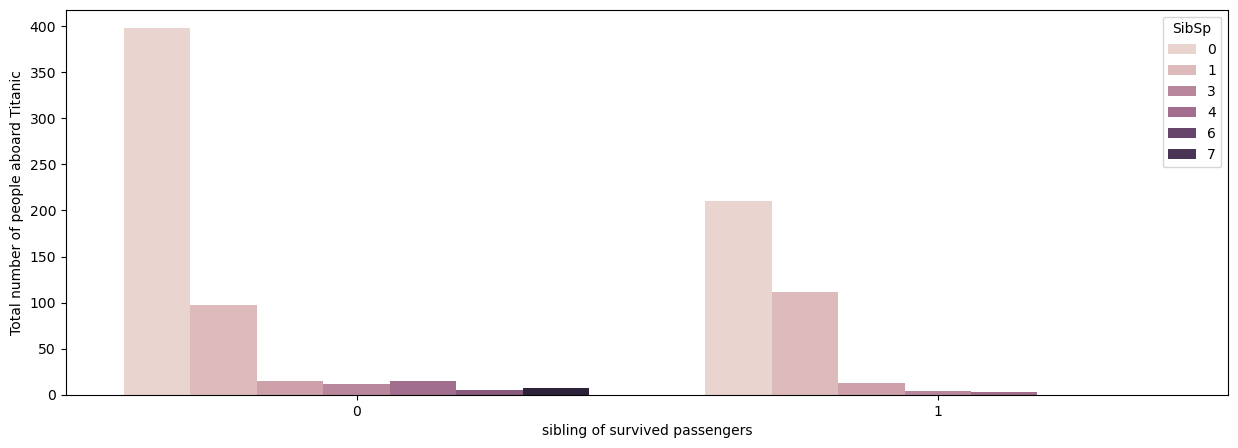

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='SibSp')
plt.xlabel('sibling of survived passengers')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

# Pair Plot

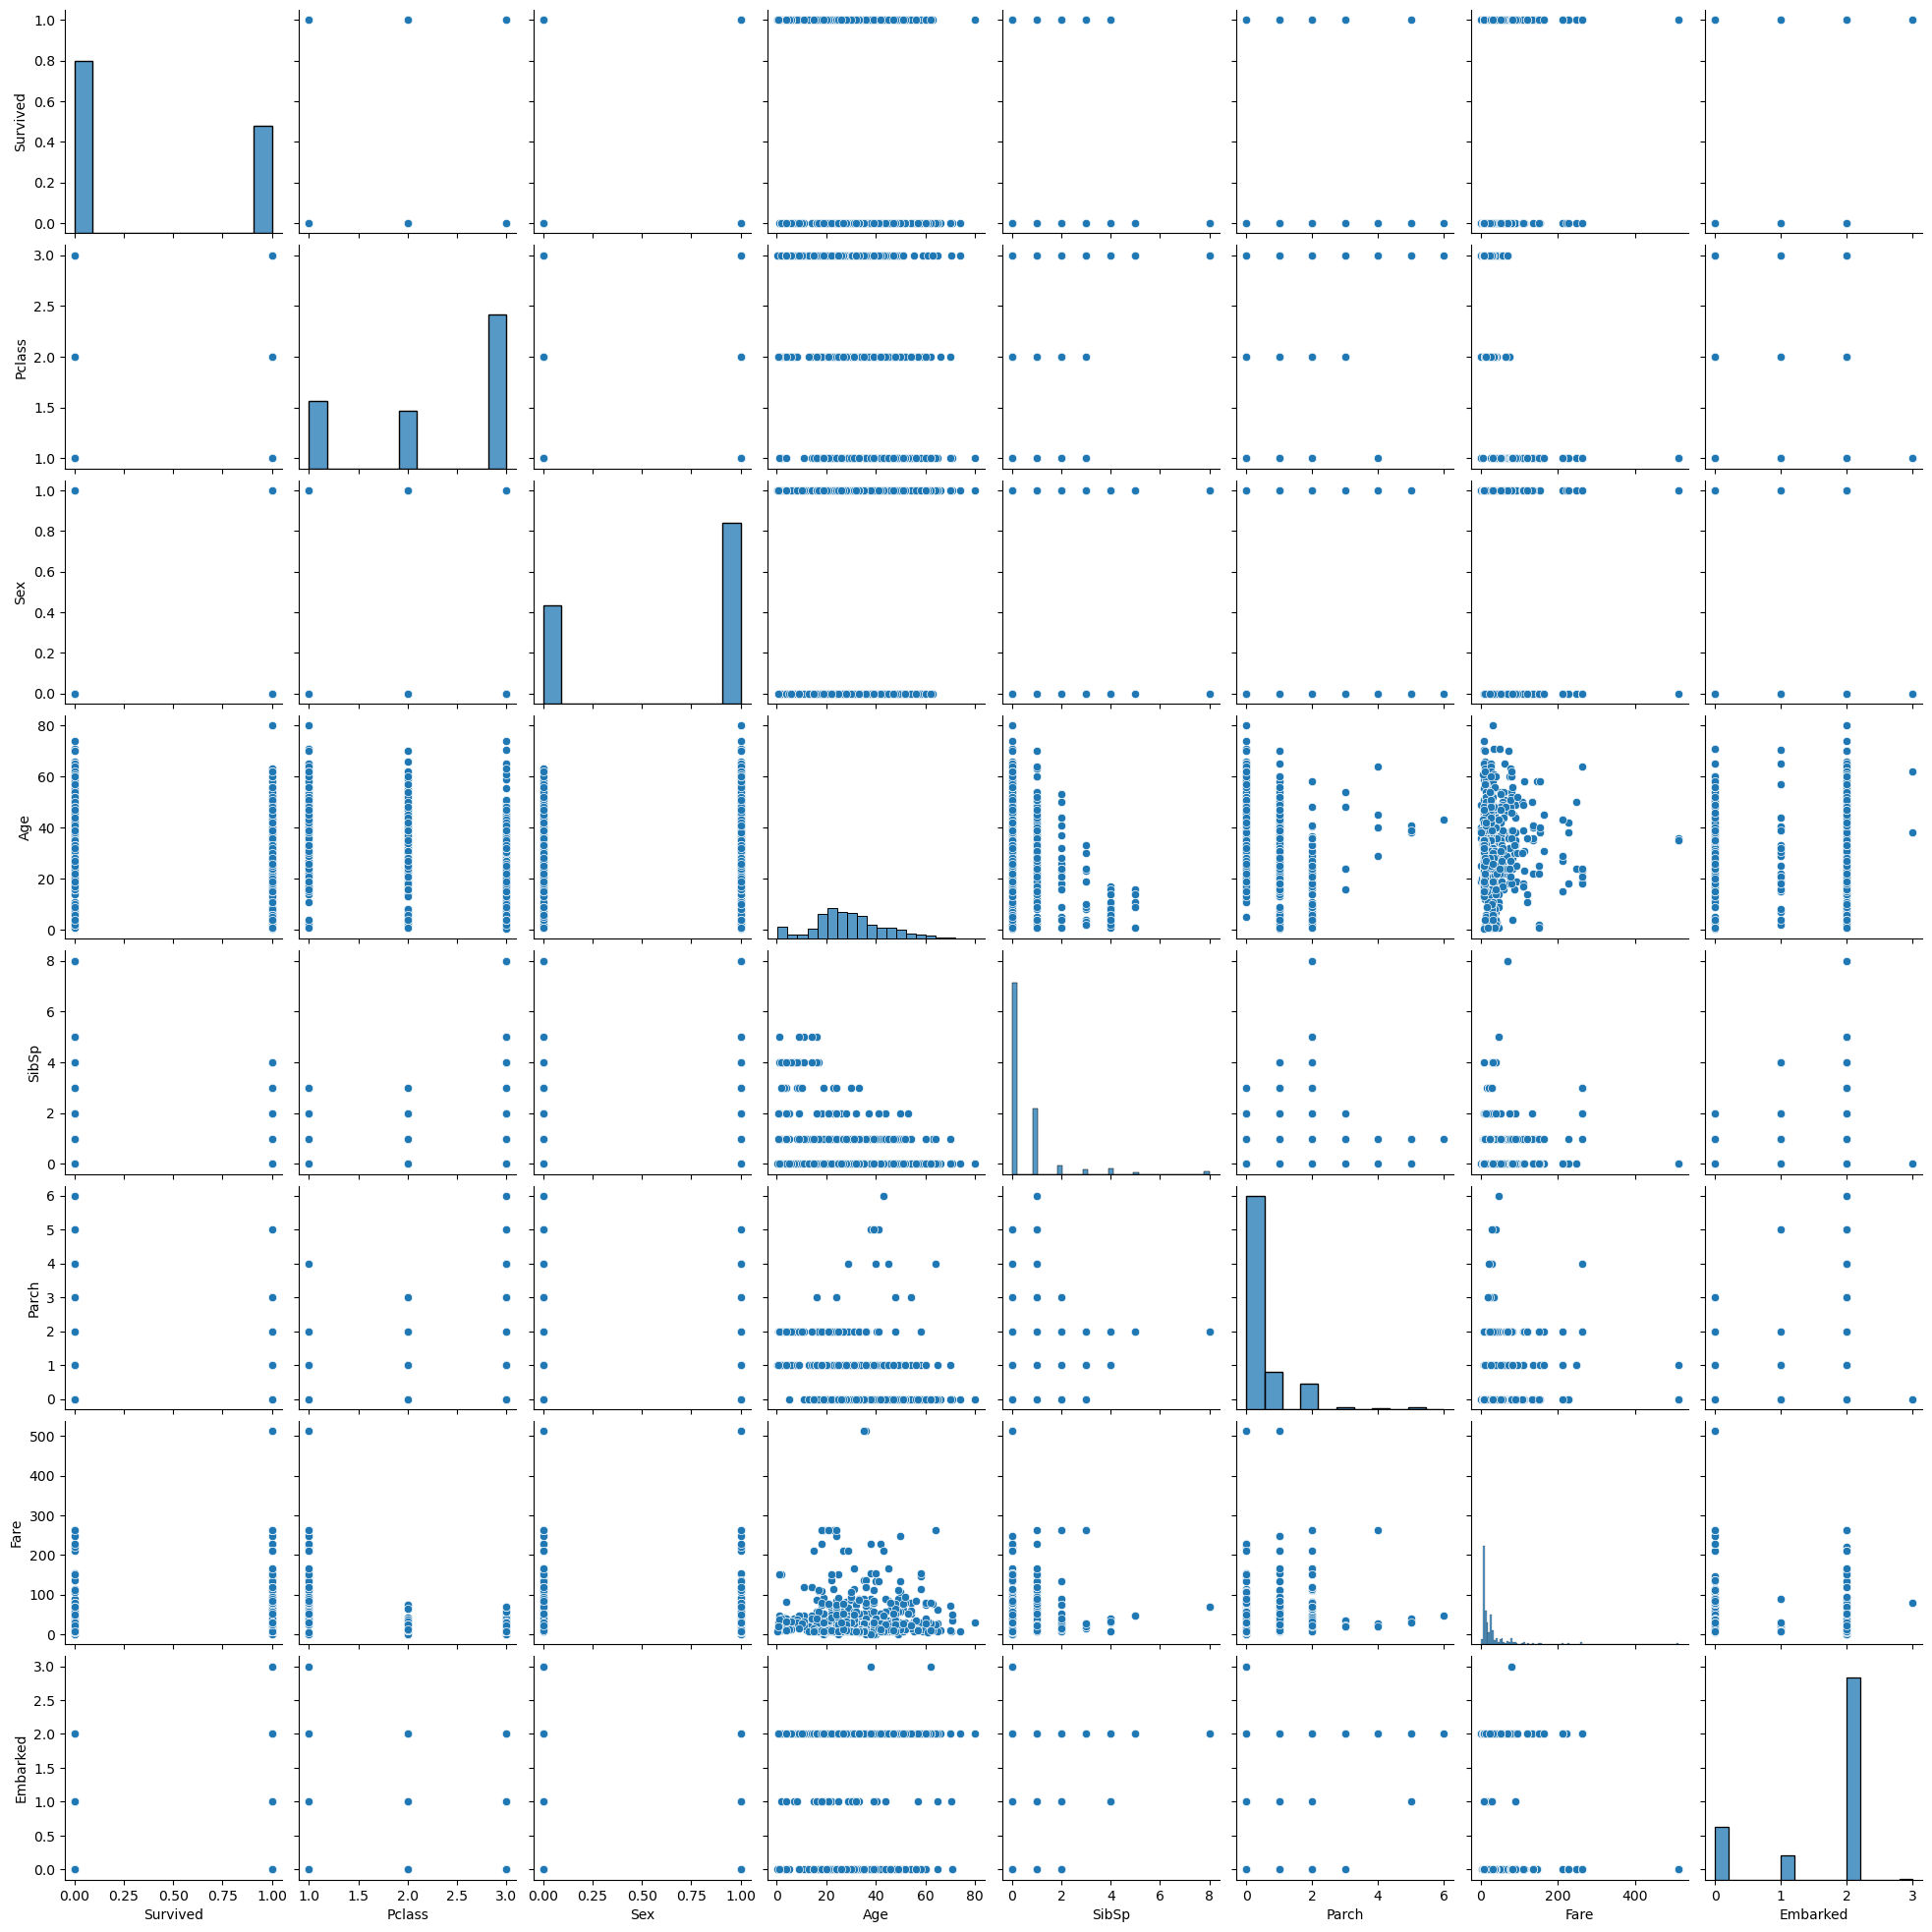

In [23]:
sns.pairplot(df)
plt.show()

The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data. Looking at the above picture we can see the presence of both skewness and outliers but we shall check few more visuals to confirm if those need to be treated or not.

# Box Plot

<Axes: xlabel='Pclass', ylabel='Age'>

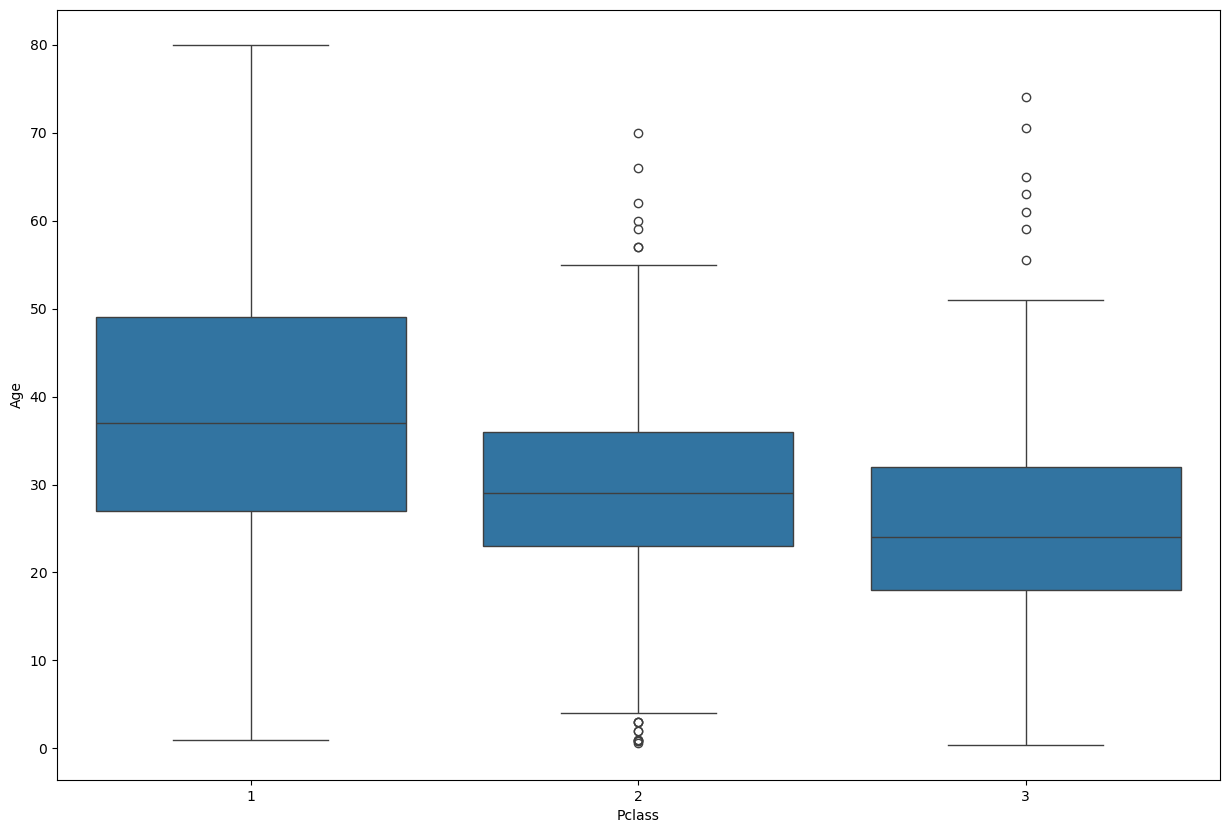

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=df)

For filling the missing value in the age column I am checking the average age of a person in that particular class so that we do not just randomly fill in those years for the age column.

In the above boxplot it shows that the class 1 people who are wealthy are above the average age for the other 2 class and in the class 3 there were mostly youngsters who did not have hefty money at that age.

In [25]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

So we have created a function after applying the observations from the boxplot to get the average age based on the class of travel. In class 1 we see average age as 37, for class 2 the average age is around 29 and class 3 has an approximate avergae age of 24.

We will now use this function to fill the missing age values.

In [26]:
df["Age"] = df[["Age","Pclass"]].apply(fill_age, axis=1)

Using our fill_age function we have now added the average years data into the age column of our data set.

In [27]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

We have used the mode option to fill the missing data in Embarked column with the value most common for the column row wise.

### Distribution Plot

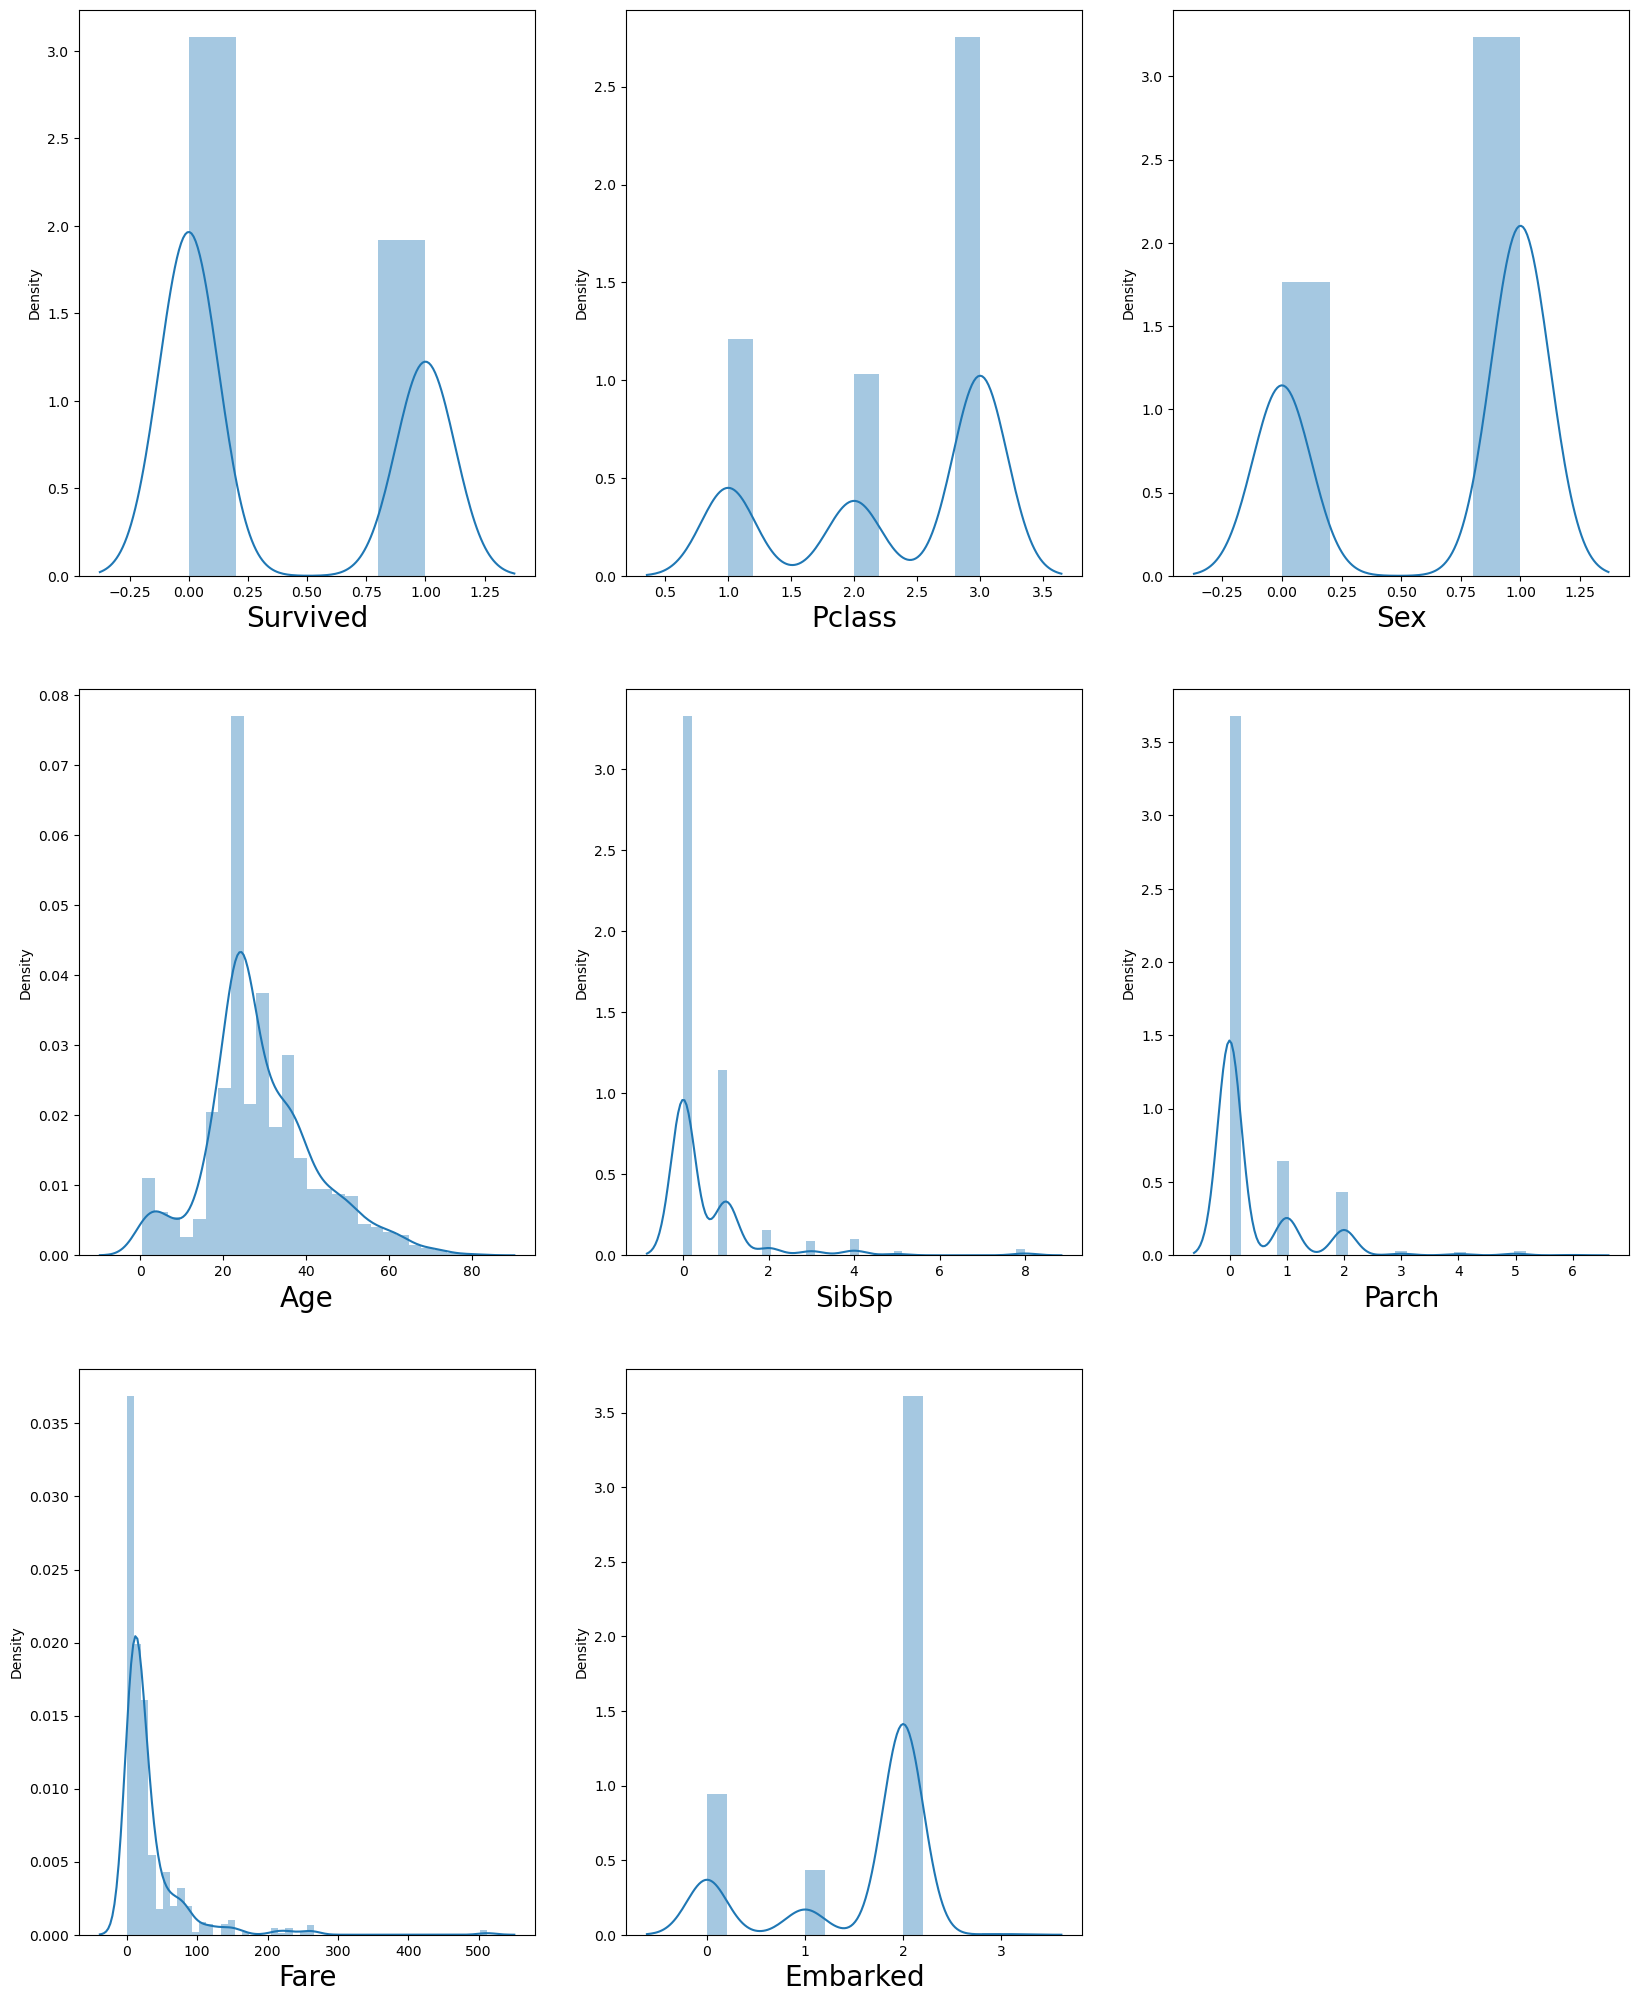

In [28]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.show()

Looking at the distribution plot after applying the encoding technique and ensuring all object datatype are converted to numbers that can be used for visualization we see that the presence of outliers are affecting the distribution patterns and causing skewness that might need to be treated.

But first I will try to build a model retaining all the data and check whether the model accuracy gets affected due to it or not.

### Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

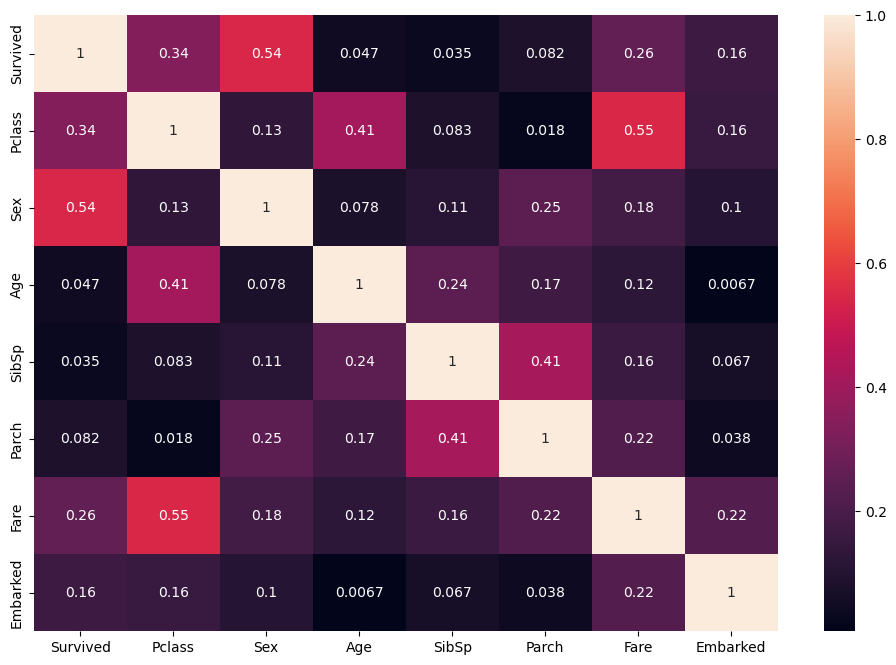

In [29]:
df_corr = df.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

No multicollinearity found. We can take all.

In [30]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

### Feature Scaling

In [31]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Even though all our feature columns were of numeric data type I was unhappy with the decimal place differences and was worried that it might make my model biased towards float and integers. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

In [32]:
x

array([[ 0.82737724,  0.73769513, -0.53383369, ..., -0.47367361,
        -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.67489052, ..., -0.47367361,
         0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.23165264, ..., -0.47367361,
        -0.48885426,  0.58111394],
       ...,
       [ 0.82737724, -1.35557354, -0.38274316, ...,  2.00893337,
        -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513, -0.23165264, ..., -0.47367361,
        -0.04438104, -1.93846038],
       [ 0.82737724,  0.73769513,  0.22161894, ..., -0.47367361,
        -0.49237783, -0.67867322]])

### Creating the training and testing data sets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

### ML Model Function

In [34]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train, x_test,y_train, y_test, train = True):
    clf.fit(x_train,y_train)
    
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f'Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%')
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        
        print(f'Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, test_pred, digits = 2))

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any classification machine learning model that calls for this function.

Note: I have not removed the outliers since the loss of those data gave a lower score on the classification model when compared to retaining the outliers. Also the usage of Z score and IQR methods gave a data loss of more than 15 percent which I could not afford on my current data set.

In [35]:
# Logistic Regression

lr = LogisticRegression()

metric_score(lr,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(lr,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 80.90%

===============Test Result================
Accuracy Score: 80.45%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Created the Logistic Regression Model and checked for it's evaluation metrics.

In [36]:
# Support Vector Classifier

svc = SVC()

metric_score(svc,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(svc,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 84.69%

===============Test Result================
Accuracy Score: 82.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [37]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()

metric_score(dt,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(dt,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 98.60%

===============Test Result================
Accuracy Score: 79.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [38]:
# Random Forest Classifier

rf = RandomForestClassifier()

metric_score(rf,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(rf,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 98.60%

===============Test Result================
Accuracy Score: 81.01%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [39]:
# K Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors=15)

metric_score(knn,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 83.29%

===============Test Result================
Accuracy Score: 81.01%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.66      0.74        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [40]:
# Extra Trees Classifier

etc = ExtraTreesClassifier()

metric_score(etc,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(etc,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 98.60%

===============Test Result================
Accuracy Score: 79.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Created the Extra Trees Classifier Model and checked for it's evaluation metrics.


### Hyper parameter tuning on the best ML Model (according to me)

In [41]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21, 42, 104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']
            }

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [42]:
grd = GridSearchCV(SVC(), svc_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [43]:
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [44]:
grd.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [45]:
svch = grd.best_estimator_

metric_score(svch,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(svch,x_train,x_test,y_train,y_test, train = False)  # This is for testing score


===============Train Result===============
Accuracy Score: 84.69%

===============Test Result================
Accuracy Score: 82.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

### Saving the model

In [46]:
filename = "titanic_FinalModel.pkl"
joblib.dump(svch, filename)

['titanic_FinalModel.pkl']

#### Finally, saving my best classification model using the joblib library.